In [91]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import set_theme

In [92]:
df =  pd.read_csv('datasets/HousingData.csv')

In [93]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [94]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560262,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


In [95]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [96]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [97]:
df = df.fillna(0)
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [98]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.shape

(506, 14)

In [99]:
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 16.01%
Column ZN outliers = 100.00%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [100]:
for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    # Filter the DataFrame to exclude outliers
    df = df.loc[(v >= q1 - 1.5 * irq) & (v <= q3 + 1.5 * irq)]

In [101]:
df = df.drop(['ZN', 'CHAS'], axis=1)
df.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,0.00,36.2
5,0.02985,2.18,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


<AxesSubplot:>

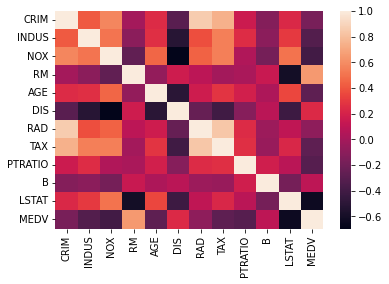

In [102]:
sns.heatmap(df.corr())

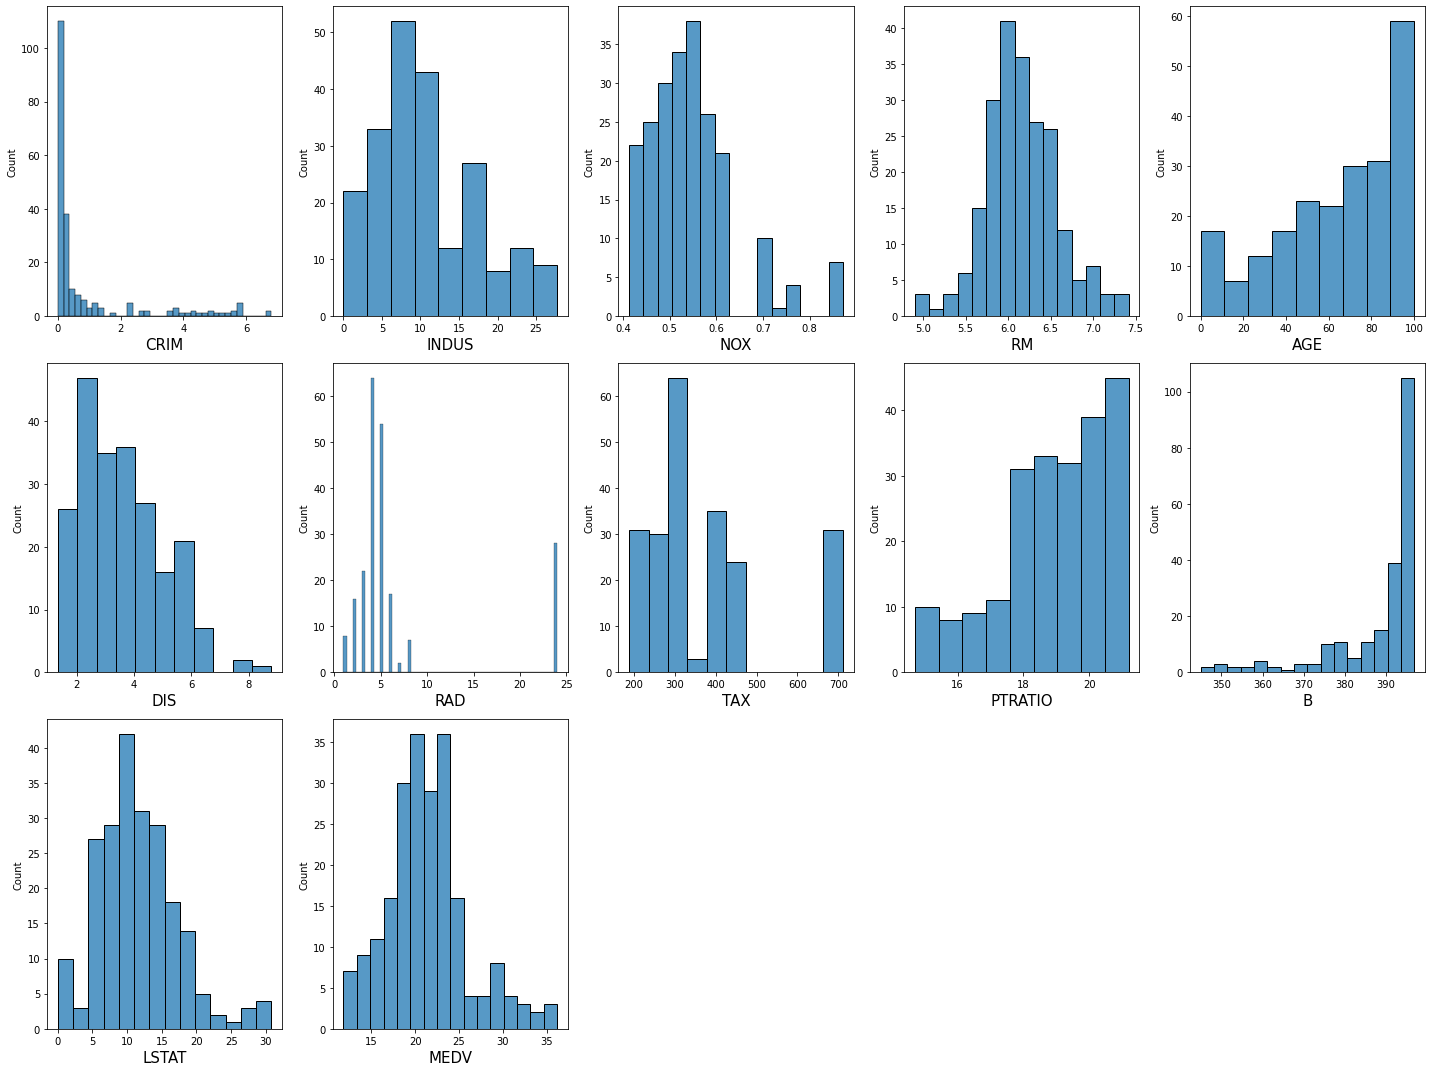

In [103]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [104]:
df.corr(method='pearson').sort_values(by='MEDV', ascending=False)

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,-0.171444,-0.326389,-0.396726,0.642826,-0.279263,0.235583,-0.086366,-0.282525,-0.313245,0.099518,-0.638118,1.000000
RM,-0.002776,-0.103164,-0.266059,1.000000,-0.071091,0.161219,0.088407,-0.008839,0.014537,0.143665,-0.605784,0.642826
DIS,-0.298352,-0.521640,-0.694265,0.161219,-0.506213,1.000000,-0.250413,-0.407934,-0.121811,0.081603,-0.421882,0.235583
B,-0.128952,-0.100387,-0.186752,0.143665,0.028756,0.081603,-0.035336,-0.051517,0.177793,1.000000,-0.189852,0.099518
RAD,0.854726,0.371655,0.440297,0.088407,0.164302,-0.250413,1.000000,0.838249,0.241969,-0.035336,0.102821,-0.086366
CRIM,1.000000,0.411439,0.573353,-0.002776,0.244449,-0.298352,0.854726,0.745701,0.157309,-0.128952,0.226473,-0.171444
AGE,0.244449,0.262131,0.455800,-0.071091,1.000000,-0.506213,0.164302,0.280882,0.184720,0.028756,0.350998,-0.279263
TAX,0.745701,0.545685,0.548403,-0.008839,0.280882,-0.407934,0.838249,1.000000,0.264422,-0.051517,0.221402,-0.282525
PTRATIO,0.157309,0.250288,0.041182,0.014537,0.184720,-0.121811,0.241969,0.264422,1.000000,0.177793,0.084403,-0.313245
INDUS,0.411439,1.000000,0.506609,-0.103164,0.262131,-0.521640,0.371655,0.545685,0.250288,-0.100387,0.305007,-0.326389


In [105]:
X = df[['RM', 'B', 'DIS']]
Y = df['MEDV']

In [106]:
from sklearn.model_selection import train_test_split
 
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size =0.2)
  
print("xtrain shape : ", xtrain.shape)
print("xtest shape  : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape  : ", ytest.shape)

xtrain shape :  (174, 3)
xtest shape  :  (44, 3)
ytrain shape :  (174,)
ytest shape  :  (44,)


In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

print(xtrain.shape, "  ==  ", ytrain.shape)

(174, 3)   ==   (174,)


In [108]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain, ytrain)
  
y_pred = reg.predict(xtest)

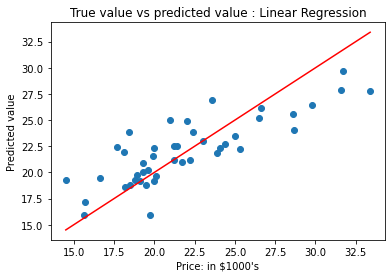

In [109]:
plt.scatter(ytest, y_pred)

ideal_values = np.linspace(min(ytest), max(ytest))  
plt.plot(ideal_values, ideal_values, color='red')

plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [112]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(ytest, y_pred))
print('MSE:', metrics.mean_squared_error(ytest, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))

MAE: 2.0081298076261196
MSE: 6.495342454378342
RMSE: 2.548596173264478


In [111]:
# Print the intercept
print(f'Intercept: {reg.intercept_}\n')

Intercept: 21.175862068965518

